# Decoding The Dairy Cheese Code: A Machine Learning Final Project
### Author: Eric Hsieh

## Introduction
Cheese is one of the world's most cherished foods, enjoyed by many on a regular basis. However, not all cheeses are created equal. They vary significantly in characteristics and how they can be consumed such as in a creamy fondue, on a vibrant charcuterie board, or layered in a delicious sandwich. As consumers become increasingly conscious of fat content in their diets, it is essential for producers to provide accurate labeling for their cheeses. This project aims to simplify this process by developing a machine learning model that predicts whether a cheese is lower-fat or higher-fat based on two key factors: milk type and moisture content.

### Goal
The goal of this project is to develop and apply machine learning models to analyze a dataset of Canadian cheese. The objective is to classify cheeses as lower-fat or higher-fat based on their milk type and moisture content. 


### Question
Can we accurately classify Canadian cheeses as lower-fat or higher-fat using only their milk type and moisture content?


### Expected Outcome
The project will result in a classification model capable of assigning the appropriate category to each cheese based on the given cheese characteristics.

### Machine Learning Framework
This project is a classification problem within a supervised machine learning framework where the target variable is the cheese fat level, represented by the FatLevel column.


### Significance
This question is relevant because people care about the fat content in their food, especially when choosing cheese. Producers can use this model to label their cheeses more accurately, making it easier for shoppers to pick what’s right for them. It also helps producers and stores market their products better to meet different diet needs.


## Exploratory Data Analysis (EDA)

### Reading the data

I will begin by importing the libraries required to perform analysis, and the the cheese_data.csv file.

In [1]:
# import necesesary libraries
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
import pandas as pd
import numpy as np

# Load the dataset cheese_data.csv
cheese_df = pd.read_csv('data/cheese_data.csv')
cheese_df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


**Table 1:** Cheese dataset showing the first 5 rows of data.

Then, I will filter out the dataframe with the interested columns.

In [3]:
# Filter feature and target columns
cheese_df = cheese_df.loc[:, ['MoisturePercent', 'MilkTypeEn', 'FatLevel']]
cheese_df.info()
cheese_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MoisturePercent  1028 non-null   float64
 1   MilkTypeEn       1041 non-null   object 
 2   FatLevel         1042 non-null   object 
dtypes: float64(1), object(2)
memory usage: 24.5+ KB


,MoisturePercent,MilkTypeEn,FatLevel
0,47.0,Ewe,lower fat
1,47.9,Cow,lower fat
2,54.0,Cow,lower fat
3,47.0,Cow,lower fat
4,49.4,Cow,lower fat


**Table 2:** Filtered Cheese data with desired feature and target variables showing the first 5 rows of data.

#### Splitting the data
Before we do any Data Exploration, pre-processin, or imputing, we want to immediately split the data into two main parts: training and testing. Splitting the data early on helps us assess how well our model generalizes in the future.

We don't separate them into targets yet because we want to perform EDA on the training portion.

In [4]:
# Split the data into training and testing sets using an 80/20 split
cheese_train, cheese_test = train_test_split(cheese_df, train_size=0.80)
cheese_train.info()
cheese_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 991 to 528
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MoisturePercent  820 non-null    float64
 1   MilkTypeEn       832 non-null    object 
 2   FatLevel         833 non-null    object 
dtypes: float64(1), object(2)
memory usage: 26.0+ KB


,MoisturePercent
count,820.000000
mean,47.021220
std,9.587979
min,12.000000
25%,40.000000
50%,45.500000
75%,52.000000
max,92.000000


**Table 3**: MoisturePercent column's summary statictics.

In [31]:
# Unique values for 'MilkTypeEn' and 'FatLevel'
print(
    'Milk Type\n',
    cheese_train['MilkTypeEn'].value_counts(),
    '\n\nFat Level\n',
    cheese_train['FatLevel'].value_counts(),
)

Milk Type
 Cow             586
Goat            168
Ewe              49
Cow and Goat     10
Ewe and Cow       3
Ewe and Goat      2
Buffalo Cow       1
Name: MilkTypeEn, dtype: int64 

Fat Level
 lower fat     526
higher fat    293
Name: FatLevel, dtype: int64


#### Missing Data

In [6]:
# Count of missing data
missing_counts = cheese_train.isna().sum()

missing_moisture_percent = missing_counts['MoisturePercent']
missing_milk_type = missing_counts['MilkTypeEn']
print(f"Count of Missing Data for MoisturePercent: {missing_moisture_percent} missing values")
print(f"Count of Missing Data for MilkTypeEn: {missing_milk_type} missing values")
cheese_train.isna().sum()

Count of Missing Data for MoisturePercent: 13 missing values
Count of Missing Data for MilkTypeEn: 1 missing values


MoisturePercent    13
MilkTypeEn          1
FatLevel            0
dtype: int64

In [7]:
# View the rows with missing data in any column
missing_data_rows = cheese_train[cheese_train.isnull().any(axis=1)]
missing_data_rows

,MoisturePercent,MilkTypeEn,FatLevel
61,NaN,Cow,higher fat
85,NaN,Ewe,lower fat
902,NaN,Ewe,lower fat
703,NaN,Cow,lower fat
75,NaN,Cow,higher fat
88,NaN,Cow,lower fat
704,NaN,Cow,lower fat
141,NaN,Cow,lower fat
1029,42.0,NaN,higher fat
468,NaN,Cow,lower fat


**Table 4**: Missing data rows with at least one NaN value.

### Data Visualization
We will now perform data visualization on the selected features and target variable.

In [10]:
# Figure 1: Distribution of Milk Types Plot
milk_types_distribution = alt.Chart(cheese_df).mark_bar().encode(
    x='count:Q',
    y=alt.Y('MilkTypeEn:O', sort=alt.SortField(field='count', order='descending')),
    color=alt.Color('MilkTypeEn:N', legend=alt.Legend(title="Milk Type")),
).properties(
    title='Distribution of Milk Types',
    width=400,
    height=180
)

# footer as a separate text layer
milk_types_footer = alt.Chart(pd.DataFrame({'text': ['Figure 1: This chart shows the count of cheeses by milk type.']})).mark_text(
    align='center',
    baseline='middle',
    fontSize=12
).encode(
    x=alt.value(200),
    y=alt.value(225),
    text='text:N'
)
milk_types_distribution_chart = milk_types_distribution + milk_types_footer
#milk_types_distribution_chart

In [11]:
# Figure 2: Distribution of Moisture Percentage Plot
moisture_distribution = alt.Chart(cheese_df).mark_bar().encode(
    alt.X('MoisturePercent:Q', bin=alt.Bin(maxbins=50), title='Moisture Percentage'),
    alt.Y('count():Q', title='Count')
).properties(
    title='Distribution of Moisture Percentage in Canadian Cheeses',
    width=500,
    height=300
)

# footer as a separate text layer
moisture_footer = alt.Chart(pd.DataFrame({'text': ['Figure 2: This chart shows the distribution of moisture percentages in Canadian cheeses.']})).mark_text(
    align='center',
    baseline='middle',
    fontSize=12
).encode(
    x=alt.value(250),
    y=alt.value(345),
    text='text:N'
)
moisture_distribution_chart = moisture_distribution + moisture_footer
#moisture_distribution_chart

In [12]:
# Figure 3: Distribution of Fat Level Plot
fat_level_distribution = alt.Chart(cheese_df).mark_bar().encode(
    alt.X('FatLevel:N', title='Fat Level'),  # Categorical variable
    alt.Y('count():Q', title='Count'),  # Count of occurrences
    color=alt.Color('FatLevel:N', legend=alt.Legend(title="Fat Level"))  # Color by fat level
).properties(
    title='Distribution of Fat Levels in Canadian Cheeses (Figure 3.)',
    width=400,
    height=300
)

# footer as a separate text layer
fat_level_footer = alt.Chart(pd.DataFrame({'text': ['Figure 3: This chart shows the distribution of fat levels in Canadian cheeses.']})).mark_text(
    align='center',
    baseline='middle',
    fontSize=12
).encode(
    x=alt.value(200),
    y=alt.value(380),
    text='text:N'
)
fat_level_distribution_chart = fat_level_distribution + fat_level_footer
#fat_level_distribution_chart

In [13]:
# Figure 4: Box plot for Moisture Percentage by Fat Level
moisture_vs_fat = alt.Chart(cheese_df).mark_boxplot().encode(
    x='FatLevel:N',
    y='MoisturePercent:Q',
    color='FatLevel:N'
).properties(
    title='Moisture Percentage by Fat Level (Figure 4.)',
    width=400,
    height=300
)

# Create a footer as a separate text layer
moisture_vs_fat_footer = alt.Chart(pd.DataFrame({'text': ['Figure 4: This chart shows the moisture percentage distribution by fat level.']})).mark_text(
    align='center',
    baseline='middle',
    fontSize=12
).encode(
    x=alt.value(200),
    y=alt.value(350)
)
moisture_vs_fat_chart = moisture_vs_fat + moisture_vs_fat_footer
#moisture_vs_fat_chart

#### EDA Dashboard

In [14]:
# Dashboard
dashboard = alt.hconcat(
    moisture_distribution_chart,
    milk_types_distribution_chart
).resolve_scale(
    color='independent'  # Use independent scales for the y-axis
)

# Add the other charts to the dashboard vertically
distribution_dashboard = alt.vconcat(
    dashboard,
    alt.hconcat(
        fat_level_distribution,
        moisture_vs_fat_chart
    ).resolve_scale(
    color='independent'
    )
)

distribution_dashboard = distribution_dashboard.properties(
    title='Visualizing Features and Target Distributions'
).configure_title(
    anchor='middle',  # Center the title
    fontWeight='bold'  # Make the title bold
)
distribution_dashboard

alt.VConcatChart(...)

**Figure 5**: Dashboard of all the Data Visualization figures. 

#### Data Description
**Missing Data**
* There are some missing values in the features. As of my currently observation (at this current iteration of running the Jupyter notebook code) there are **14** rows out of a total of **833** data points that contains at least one missing value. 
* **MoisturePercent** has 13 missing values
* **MilkTypeEn** has 1 missing value

**Data Distribution**
* The **"Distribution of Moisture Percentage in Canadian Cheeses"** chart has a distribution similar to the normal distribution. It may benefit from scaling during the preprocessing step to enhance model performance
* **Distribution of Fat Level** chart suggests that there are more lower-fat than higher-fat cheese
* **Moisture Percentage by Fat Level** box plot shows the lower fat cheeses generally have a higher moisture percentage compared to the higher fat cheeses
* The box plot indicates that the median moisture percentage for lower fat cheeses is significantly higher, with a median around 50%, while the median for higher fat cheeses is around 40%

**Class Imbalance**
* **FatLevel** has some degree of class imbalance. To address this, I plan to utilize the scikit-learn's class_weights feature in my modeling approach

#### Metrics for Success Evaluation
I will be using **classification matrix** and **F1-score** as metrics to evaluate the model's success.

There is class imbalance in the target variable so accuracy is not a reliable metric. It may give a misleading impression of model performance. I will instead use the F1-score, which balances both precision and recall which gives a more comprehensive evaluation. Since the dataset is imbalanced, I will use the sample-weighted F1-score so that all classes are properly accounted for in the evaluation.



# Preprocessing

#### Cleaning the data

Before splitting the features from the target, I’ll take care of any missing data. Since there are very few rows with missing values, I’m just going to drop any rows in both the training and test sets that have NaN values. I'm not using impuration because the small number of missing rows won't affect the data much.

In [15]:
# Remove rows with missing data
cheese_train = cheese_train.dropna()
cheese_test = cheese_test.dropna()
cheese_train

,MoisturePercent,MilkTypeEn,FatLevel
991,42.0,Cow,higher fat
165,52.0,Cow,lower fat
948,50.0,Goat,lower fat
593,57.0,Goat,lower fat
717,42.0,Cow,lower fat
...,...,...,...
595,39.0,Cow,higher fat
434,50.0,Cow,lower fat
818,70.0,Goat,lower fat
426,43.0,Goat,lower fat


**Table 5**: Cheese data with dropped NaN values.

In [16]:
# Separate features (X) from the target variable (y) for training and test sets
X_train = cheese_train.drop(columns='FatLevel')
y_train = cheese_train['FatLevel']
X_test = cheese_test.drop(columns='FatLevel')
y_test = cheese_test['FatLevel']


In [17]:
# Define categorical and numerical features
categorical_features = ['MilkTypeEn']
numerical_features = ['MoisturePercent']

print(categorical_features, numerical_features)

['MilkTypeEn'] ['MoisturePercent']


#### Column Transformer

For the numerical columns, I use the StandardScaler to normalize the data. For the categorical columns, I use the OneHotEncoder since all categorical columns are nominal

In [18]:
# Pipeline for numerical features
numerical_pipeline = make_pipeline(StandardScaler())

# Pipeline for categorical features
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(dtype=int, handle_unknown='ignore'),
)

# Column transformer
preprocessing_pipeline = make_column_transformer(
    (numerical_pipeline, numerical_features), 
    (categorical_pipeline, categorical_features)
)

# Methods & Results

#### Baseline Model
Let us begin with a baseline model using DummyClassifier as a reference point for future comparisons.

In [32]:
baseline_model = DummyClassifier(strategy="stratified")
baseline_model.fit(X_train, y_train)
baseline_score = pd.DataFrame(cross_validate(baseline_model, X_train, y_train, return_train_score=True))
# Display
print(baseline_score.mean())

fit_time       0.001285
score_time     0.000710
test_score     0.559187
train_score    0.533875
dtype: float64


#### Linear Model
Linear logistic regression model using LogisticRegression and perform a 5-fold cross-validation.

In [20]:
logistic_pipeline = make_pipeline(preprocessing_pipeline, LogisticRegression())

# 5-fold cross-validation
logistic_cv_results = pd.DataFrame(
    cross_validate(logistic_pipeline, X_train, y_train, return_train_score=True)
)
print(logistic_cv_results.mean())

fit_time       0.032505
score_time     0.010433
test_score     0.770462
train_score    0.772893
dtype: float64


#### Additional Supervised Machine Learning Models
My first additional model of choice is the **RandomForestClassifier**. I will create a pipeline that includes the preprocessing steps, transforming the numerical and categorical columns using the preprocessing_pipeline. Then, I will perform 5-fold cross-validation on the training data.

Second additional model is the **Support Vector Machine classifier** from scikit-learn's **SVC**. The pipeline includes the preprocessing steps, transforming the numerical and categorical columns using the preprocessing_pipeline. Then a 5-fold cross-validation on the training data with the mean() printed out.

The third and last additional model is the **K-Nearest Neighbors (KNN)** classifier. The pipeline includes the preprocessing steps, transforming the numerical and categorical columns using the preprocessing_pipeline. Then a 5-fold cross-validation on the training data with the mean() printed out.

In [21]:
# Random Forest Classifier model
random_forest_pipeline = make_pipeline(preprocessing_pipeline, RandomForestClassifier(random_state=42))
rf_cv_results = pd.DataFrame(
    cross_validate(random_forest_pipeline, X_train, y_train, cv=5, return_train_score=True)
)
print("Random Forest Classifier model:")
print(rf_cv_results.mean(),"\n")

# Support Vector Classifier (SVC)
svc_pipeline = make_pipeline(preprocessing_pipeline, SVC(random_state=42))
svc_cv_results = pd.DataFrame(
    cross_validate(svc_pipeline, X_train, y_train, cv=5, return_train_score=True)
)
print("Support Vector Classifier (SVC):")
print(svc_cv_results.mean(),"\n")


# K-Nearest Neighbors (KNN)
knn_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
knn_cv_results = pd.DataFrame(
    cross_validate(knn_pipeline, X_train, y_train, cv=5, return_train_score=True)
)
print("K-Nearest Neighbors Classifier (KNN):")
print(knn_cv_results.mean())


Random Forest Classifier model:
fit_time       0.282568
score_time     0.027405
test_score     0.802222
train_score    0.851649
dtype: float64 

Support Vector Classifier (SVC):
fit_time       0.026844
score_time     0.008845
test_score     0.797307
train_score    0.800670
dtype: float64 

K-Nearest Neighbors Classifier (KNN):
fit_time       0.014345
score_time     0.018707
test_score     0.805881
train_score    0.832417
dtype: float64


#### Training Score For The 5 Models

In [22]:
# Dictionary of models and their training scores
print_dict = {
    'Dummy Classifier: ': baseline_score['train_score'],
    'Logistic Regression: ': logistic_cv_results['train_score'],
    'Random Forest Classifier: ': rf_cv_results['train_score'],
    'Support Vector Classifier (SVC): ': svc_cv_results['train_score'],
    'K-Nearest Neighbors Classifier (KNN): ': knn_cv_results['train_score']
}

# Print the mean training scores for each model
print('Model Training Scores:\n')
for model_name, train_scores in print_dict.items():
    print(model_name, train_scores.mean())

Model Training Scores:

Dummy Classifier:  0.5357065723328989
Logistic Regression:  0.7728933159560604
Random Forest Classifier:  0.8516491342394341
Support Vector Classifier (SVC):  0.8006698007819774
K-Nearest Neighbors Classifier (KNN):  0.8324166821820889


I observe that the **Random Forest Classifier** and **K-Nearest Neighbors Classifier (KNN)** has the highest training score, while the **Dummy Classifier** is performing at baseline level as expected.

### Hyperparameter

#### Random Forest Classifier
We will now be using hyperparameters for tuning on the two best models: <br>**Random Forest Classifier** and **KNN Classifier**

To further improve the performance of the Random Forest Classifier, I use RandomizedSearchCV to find the optimal value for n_estimators.

In [23]:
parameters = {"randomforestclassifier__max_depth": range(1, 151, 10)}
depth_search = RandomizedSearchCV(
    random_forest_pipeline, 
    parameters, 
    cv=5,
    n_iter=5,
    return_train_score=True, 
    verbose=2
)
depth_search.fit(X_train, y_train)
print(f'Best max_depth: {depth_search.best_params_["randomforestclassifier__max_depth"]}')
print(f'Best cross-validation score: {depth_search.best_score_}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............randomforestclassifier__max_depth=111; total time=   0.3s
[CV] END ..............randomforestclassifier__max_depth=111; total time=   0.2s
[CV] END ..............randomforestclassifier__max_depth=111; total time=   0.2s
[CV] END ..............randomforestclassifier__max_depth=111; total time=   0.3s
[CV] END ..............randomforestclassifier__max_depth=111; total time=   0.2s
[CV] END ...............randomforestclassifier__max_depth=61; total time=   0.2s
[CV] END ...............randomforestclassifier__max_depth=61; total time=   0.2s
[CV] END ...............randomforestclassifier__max_depth=61; total time=   0.2s
[CV] END ...............randomforestclassifier__max_depth=61; total time=   0.2s
[CV] END ...............randomforestclassifier__max_depth=61; total time=   0.2s
[CV] END ...............randomforestclassifier__max_depth=91; total time=   0.2s
[CV] END ...............randomforestclassifier__m

In [24]:
# Convert the cross-validation results into a DataFrame
cv_df = pd.DataFrame(depth_search.cv_results_)

# Select and sort relevant columns from the cross-validation
grid_results = cv_df.loc[
    :,
    [
        'mean_test_score',
        'param_randomforestclassifier__max_depth',
        'mean_fit_time',
        'rank_test_score',
    ],
].sort_values('rank_test_score')

# Best max_depth value found by RandomizedSearchCV
best_depth = depth_search.best_params_['randomforestclassifier__max_depth']
print("Optimal n_estimators: ", best_depth)

Optimal n_estimators:  111


#### K-Nearest Neighbors Classifier (KNN)

In [25]:
results_dict = {'n_neighbors': [], 'mean_train_score': [], 'mean_cv_score': []}

# Iterate through values of n_neighbors from 2 to 20 (increment by 2)
for k in range(2, 20, 2):
    knn_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier(n_neighbors=k))
    score = cross_validate(knn_pipeline, X_train, y_train, cv=5, return_train_score=True)
    results_dict['n_neighbors'].append(k)
    results_dict['mean_cv_score'].append(score['test_score'].mean())
    results_dict['mean_train_score'].append(score['train_score'].mean())

results_dict


{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18],
 'mean_train_score': [0.7304752373859615,
  0.81228030161981,
  0.8058536585365854,
  0.8012749022528393,
  0.8198999255259729,
  0.8232573077639174,
  0.8217315211320052,
  0.8238689257121579,
  0.8241733382982683],
 'mean_cv_score': [0.7082073918898699,
  0.7863609157563968,
  0.7888149034864582,
  0.768083196169385,
  0.8034490498279215,
  0.8071075864132874,
  0.8071075864132874,
  0.8083270986084093,
  0.8156591351189585]}

In [26]:
results_df = pd.DataFrame(results_dict)
best_k = int(results_df.loc[results_df['mean_cv_score'].idxmax()]['n_neighbors'])
print('Optimal n_neighbors: ', best_k)

Optimal n_neighbors:  18


## Comparing Models

I now have the optimal hyperparameters for both the **Random Forest Classifier** and the **K-Nearest Neighbors Classifier**. Now, I will create new pipelines using the same preprocessing_pipeline, and pass the optimized hyperparameters to the classifiers. I will score it to compare the models and select the final one

In [27]:
# Random Forest Classifier with optimized hyperparameters
best_rfc = make_pipeline(preprocessing_pipeline, RandomForestClassifier(max_depth=best_depth, random_state=8))
rfc_train = best_rfc.fit(X_train, y_train).score(X_train, y_train)
print('Random Forest Classifier training score: ', rfc_train)

# KNN Classifier with optimized hyperparameters
best_knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier(n_neighbors=best_k)).fit(X_train, y_train)
knn_train = best_knn.score(X_train, y_train)
print('KNN Classifier training score: ', knn_train)


Random Forest Classifier training score:  0.8485958485958486
KNN Classifier training score:  0.8302808302808303


#### Scoring on Test Set
Comparing the training scores of an unbalanced Random Forest Classifier and a balanced Random Forest Classifier.

In [28]:
# Unbalanced Random Forest Classifier (from previous step)
rfc_train = best_rfc.fit(X_train, y_train).score(X_train, y_train)

# Balanced Random Forest Classifier
rfc_balanced = make_pipeline(
    preprocessing_pipeline, 
    RandomForestClassifier(n_estimators=101, class_weight='balanced', random_state=8)
)
# Fit
balanced_score = rfc_balanced.fit(X_train, y_train).score(X_train, y_train)

print('Unbalanced training score:', rfc_train)
print('Balanced training score:', balanced_score)


Unbalanced training score: 0.8485958485958486
Balanced training score: 0.833943833943834


The **Unbalanced Random Forest Classifier** is selected as the final model because it has the better score.

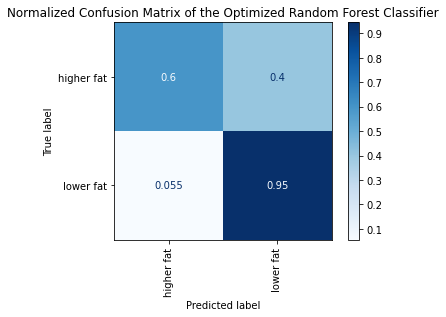

In [29]:
y_pred = best_rfc.predict(X_test)

# Confusion matrix without normalization
cm = confusion_matrix(y_test, y_pred)

# Normalized confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

cmatrix_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=best_rfc.classes_)

# Plot
cmatrix_normalized.plot(xticks_rotation='vertical', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix of the Optimized Random Forest Classifier')
plt.show()


**Figure 6**: Normalized Confusion Matrix of the Optimized Random Forest Classifier. The matrix is normalized, displaying the proportion of true positive, false positive, true negative, and false negative predictions.

The values within the matrix cells represent the probabilities of correct and incorrect classifications:
* **0.95: True positive.** The model correctly predicts 92% of the lower fat samples.
* **0.6: True negative.** The model correctly predicts 60% of the higher fat samples.
* **0.4: False positive.** The model incorrectly predicts 40% of the higher fat samples as lower fat.
* **0.055: False negative.** The model misclassifies approximately 7.9% of the lower fat samples as higher fat.



#### Classification Report

In [34]:
y_pred = best_rfc.predict(X_test)
report = classification_report(y_test, y_pred, target_names=best_rfc.classes_)
print(report)

# Calculate the sample-weighted F1 score
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Sample-Weighted F1 Score: {weighted_f1:.2f}")

              precision    recall  f1-score   support

  higher fat       0.82      0.60      0.69        62
   lower fat       0.85      0.95      0.89       146

    accuracy                           0.84       208
   macro avg       0.83      0.77      0.79       208
weighted avg       0.84      0.84      0.83       208

Sample-Weighted F1 Score: 0.83


## Writing

Given the dataset's characteristics, we focused on two primary features: MoisturePercent and MilkTypeEn. The rationale behind my decision-making is that these two features provide the best quality data with the least missing information. Based on educated guesses, there is a potential relationship relevant to classifying cheese. MoisturePercent is a continuous variable that directly affects the texture and quality of cheese, while MilkTypeEn is a categorical variable that describes the source of milk used, which can significantly influence the fat content of cheeses.

For exploring additional models, I selected a Random Forest Classifier, a Support Vector Classifier, and a K-Neighbors Classifier. I chose the Random Forest Classifier because of the class imbalance observed during the exploratory data analysis (EDA), and it is known to perform well against such imbalances. Interestingly, the unbalanced Random Forest model performed better than its balanced counterpart. Given the small dataset, which is free of significant outliers, the K-Neighbors Classifier was also a suitable choice.

The Random Forest Classifier emerged as the best fit, achieving a score of approximately 0.8456, followed by the K-Neighbors Classifier at around 0.8302 and the Support Vector Classifier with a score of approximately 0.8007. The Random Forest Classifier's superior performance can likely be attributed to its robustness against class imbalance and its ability to generalize better compared to the other models.

## Discussion

This project aimed to develop a supervised machine learning model to classify cheeses as lower-fat or higher-fat based on milk type and moisture content. We achieved a solid F1-score of 0.83, indicating that the model effectively distinguishes between the two cheese types. This is great for the cheese industry, as it means our model can help improve the accuracy of cheese labeling, which in turn assists consumers who are increasingly conscious of fat content in their diets.

The Random Forest Classifier turned out to be the best performer, thanks to its strength in handling class imbalance and its ability to combine insights from multiple trees. When we looked at feature importance, MoisturePercent was the standout predictor, followed by MilkTypeEn. This makes sense since moisture levels significantly influence how fatty a cheese is. That said, we could definitely improve the model by adding more features. For example, including rind type, manufacturing processes, or extracting key flavor characteristics could yield even better results.

We also need to consider potential biases in our data. If our dataset doesn't fully represent all the different cheese types available, that could skew our model results. We would have to adjust data that are overrepresented or underrepresented.

Future analyses could benefit from experimenting with more advanced methods, like data augmentation or count vectorization, to enhance model performance. Implementing these features could greatly improve performance and interpretability, making the model even more reliable.

## References

* Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Boureau, Y., ... & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Retrieved from http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf

* McKinney, W. (2010). Pandas: Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51-56). Retrieved from https://conference.scipy.org/proceedings/scipy2010/mckinney.html

* Van der Walt, S., Colbert, S. C., & Varoquaux, G. (2011). NumPy: A Fundamental Package for Scientific Computing with Python. In Proceedings of the 9th Python in Science Conference (Vol. 156, pp. 1-7). Retrieved from https://conference.scipy.org/proceedings/scipy2011/vanderwalt.html

* Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95. doi:10.1109/MCSE.2007.55

* VanderPlas, J., & others. (2018). Altair: A Declarative Visualization Library for Python. IEEE Transactions on Visualization and Computer Graphics, 24(1), 366-375. doi:10.1109/TVCG.2017.2745258